In [132]:
import pandas as pd

# Carregar a planilha Excel
file_path = 'Julgados outubro 2024.xlsx'
df = pd.read_excel(file_path)

# Carregar todas as abas da planilha Excel
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Concatenar todas as abas em um único DataFrame
df_combined = pd.concat(all_sheets.values(), ignore_index=True)

# Exibir as primeiras linhas do DataFrame combinado
df_combined.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,5ª Câmara Criminal
0,5ª Câmara Criminal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Processos Julgados Anal?tico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Filtros:\nPeríodo: 01/10/2023 à 01/10/2024\nRe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Recurso,Órgão Julgador,Classe Processual,Tipo Recurso,Assunto,NaN,Relator,Tipo Decisão,Decisão,NaN,NaN,Data,NaN
4,NaN,NaN,0036255-96.2024.8.16.0000 AI,17ª Câmara Cível,Agravo de Instrumento,Agravo de Instrumento Cível,Esbulho / Turbação / Ameaça,NaN,Desembargadora Substituta Simone Cherem Fabric...,Monocrático,NÃO CONHECIDO O RECURSO DE PARTE,NaN,NaN,24/05/2024,NaN


In [133]:
# Remover colunas que possuem todos os valores nulos
df_combined.dropna(axis=1, how='all', inplace=True)

# Preencher valores nulos com um valor apropriado ou remover linhas com valores nulos
# Neste caso, vamos preencher valores nulos com uma string vazia
df_combined.fillna('', inplace=True)
# Excluir as três primeiras colunas
df_combined.drop(df_combined.columns[:1], axis=1, inplace=True)
# Renomear colunas para nomes mais significativos
df_combined.columns = ['Recurso', 'Órgão Julgador', 'Classe Processual', 'Tipo Recurso', 'Assunto', 'Relator', 'Tipo Decisão', 'Decisão', 'teste 2', 'teste 3', 'Data do Julgamento']
# Remover colunas que não contêm informações relevantes
df_combined.drop(columns=['teste 2', 'teste 3'], inplace=True)
# Remover linhas que não contêm informações relevantes
# Neste caso, vamos remover linhas onde a coluna 'Processo' está vazia
df_combined = df_combined[df_combined['Recurso'] != '']
# Remover linhas onde a coluna 'Relator' não seja "Desembargadora Substituta Simone Cherem Fabricio de Melo"
df_combined = df_combined[df_combined['Relator'] == "Desembargadora Substituta Simone Cherem Fabricio de Melo"]
# Remover linhas onde a coluna 'Recurso' contém uma data
df_combined = df_combined[~df_combined['Recurso'].str.contains(r'\d{2}/\d{2}/\d{4}', na=False)]
# Exibir todas as linhas do DataFrame limpo
pd.set_option('display.max_rows', None)
df_combined.head()

C:\Users\Felipe\AppData\Local\Temp\ipykernel_1700\7352484.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_combined.fillna('', inplace=True)


,Recurso,Órgão Julgador,Classe Processual,Tipo Recurso,Assunto,Relator,Tipo Decisão,Decisão,Data do Julgamento
4,0036255-96.2024.8.16.0000 AI,17ª Câmara Cível,Agravo de Instrumento,Agravo de Instrumento Cível,Esbulho / Turbação / Ameaça,Desembargadora Substituta Simone Cherem Fabric...,Monocrático,NÃO CONHECIDO O RECURSO DE PARTE,24/05/2024
5,0005843-73.2024.8.16.0004 Ag,17ª Câmara Cível,Agravo Interno Cível,Agravo Interno,Locação / Permissão / Concessão / Autorização ...,Desembargadora Substituta Simone Cherem Fabric...,Monocrático,PREJUDICADO O RECURSO,18/09/2024
6,0016209-65.2016.8.16.0033 Ap,17ª Câmara Cível,Apelação Cível,Apelação Cível,Usucapião Especial (Constitucional),Desembargadora Substituta Simone Cherem Fabric...,Monocrático,NÃO CONHECIDO O RECURSO DE PARTE,18/09/2024
7,0019119-86.2024.8.16.0000 ED,20ª Câmara Cível,Embargos de Declaração Cível,Embargos de Declaração Cível,Alienação Fiduciária,Desembargadora Substituta Simone Cherem Fabric...,Monocrático,PREJUDICADO O RECURSO,18/03/2024
8,0086559-33.2019.8.16.0014 Ap,4ª Câmara Criminal,Apelação Criminal,Apelação Criminal,Estelionato Majorado,Desembargadora Substituta Simone Cherem Fabric...,Colegiado,CONHECIDO O RECURSO DE PARTE E PROVIDO EM PARTE,16/10/2023


In [134]:
import pandas as pd

# Carregar a planilha Excel
file_path = 'Distribuidos outubro 2024.xlsx'
df = pd.read_excel(file_path)

# Carregar todas as abas da planilha Excel
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Concatenar todas as abas em um único DataFrame
df_distribuido = pd.concat(all_sheets.values(), ignore_index=True)

# Exibir as primeiras linhas do DataFrame combinado
df_distribuido.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,5ª Câmara Criminal
0,5ª Câmara Criminal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Consulta Distribui??o Anal?tico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Filtros:\nPeríodo: 01/10/2023 à 01/10/2024\nÓr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Recurso,Dt Distribuição,Tipo de Distribuição,Tipo Recurso,NaN,Assunto Principal,Órgão Julgador,Relator,NaN,Relator Substituto,NaN,NaN
4,NaN,NaN,4000906-96.2024.8.16.4321 AgExPe,12/03/2024,DISTRIBUIÇÃO MANUAL,Agravo em Execução Penal,NaN,Indulto,5ª Câmara Criminal,Cargo Vago - Desembargador Jorge Wagih Massad,NaN,Desembargadora Substituta Simone Cherem Fabric...,NaN,NaN


In [112]:
# Excluir as colunas 0, 1, 6, 10, 12 e 13 de df_distribuido
df_distribuido.drop(df_distribuido.columns[[0, 1, 6, 10, 12, 13]], axis=1, inplace=True)

# Remover colunas que possuem todos os valores nulos
df_distribuido.dropna(axis=1, how='all', inplace=True)

# Preencher valores nulos com uma string vazia
df_distribuido.fillna('', inplace=True)

# Renomear colunas para nomes mais significativos
df_distribuido.columns = ['Recurso', 'Dt Distribuição', 'Tipo de Distribuição', 'Tipo Recurso', 'Assunto Principal', 'Órgão Julgador', 'Relator', 'Relator Substituto']

# Remover linhas onde a coluna 'Recurso' está vazia
df_distribuido = df_distribuido[df_distribuido['Recurso'] != '']

# Excluir as 3 primeiras linhas
df_distribuido = df_distribuido.iloc[3:]

# Excluir todas as linhas em que a coluna "Relator Substituto" não seja igual a "Desembargadora Substituta Simone Cherem Fabricio de Melo"
df_distribuido = df_distribuido[df_distribuido['Relator Substituto'] == 'Desembargadora Substituta Simone Cherem Fabricio de Melo']

# Exibir as primeiras linhas do DataFrame atualizado
df_distribuido.head()


,Recurso,Dt Distribuição,Tipo de Distribuição,Tipo Recurso,Assunto Principal,Órgão Julgador,Relator,Relator Substituto
4,4000906-96.2024.8.16.4321 AgExPe,12/03/2024,DISTRIBUIÇÃO MANUAL,Agravo em Execução Penal,Indulto,5ª Câmara Criminal,Cargo Vago - Desembargador Jorge Wagih Massad,Desembargadora Substituta Simone Cherem Fabric...
5,0002535-57.2023.8.16.0103 Ap,12/03/2024,DISTRIBUIÇÃO AUTOMÁTICA,Apelação Criminal,Furto Qualificado,5ª Câmara Criminal,Cargo Vago - Desembargador Jorge Wagih Massad,Desembargadora Substituta Simone Cherem Fabric...
6,0000376-83.2023.8.16.0090 Ap,12/03/2024,DISTRIBUIÇÃO MANUAL,Apelação Criminal,Furto Qualificado,5ª Câmara Criminal,Cargo Vago - Desembargador Jorge Wagih Massad,Desembargadora Substituta Simone Cherem Fabric...
7,0012661-92.2021.8.16.0021 Ap,12/03/2024,REDISTRIBUIÇÃO POR SUCESSÃO,Apelação Criminal,Furto,5ª Câmara Criminal,Cargo Vago - Desembargador Jorge Wagih Massad,Desembargadora Substituta Simone Cherem Fabric...
8,0004034-87.2020.8.16.0101 Ap,12/03/2024,REDISTRIBUIÇÃO POR SUCESSÃO,Apelação Criminal,Furto,5ª Câmara Criminal,Cargo Vago - Desembargador Jorge Wagih Massad,Desembargadora Substituta Simone Cherem Fabric...


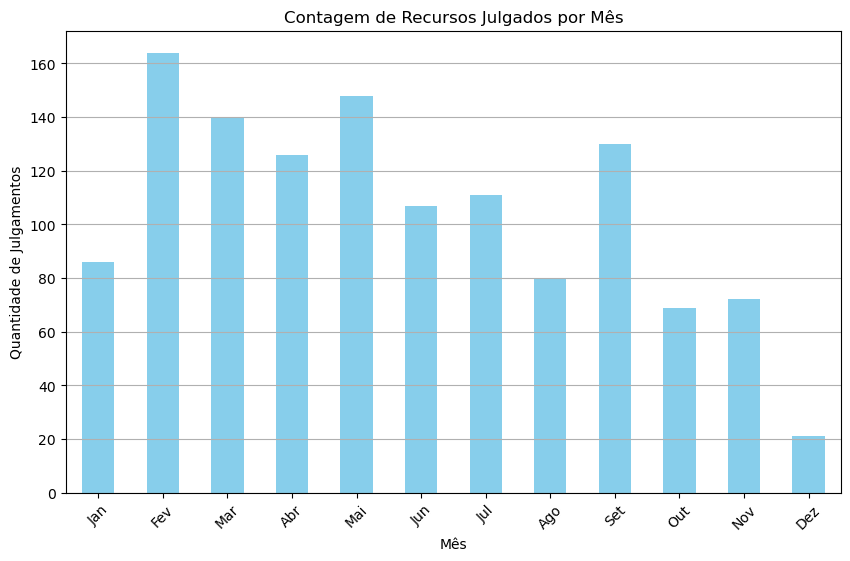

In [113]:
import matplotlib.pyplot as plt

# Converter a coluna 'Data do Julgamento' para datetime
df_combined['Data do Julgamento'] = pd.to_datetime(df_combined['Data do Julgamento'], format='%d/%m/%Y')

# Extrair o mês da coluna 'Data do Julgamento'
df_combined['Mês'] = df_combined['Data do Julgamento'].dt.month

# Contar a quantidade de julgamentos por mês
julgamentos_por_mes = df_combined['Mês'].value_counts().sort_index()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
julgamentos_por_mes.plot(kind='bar', color='skyblue')
plt.title('Contagem de Recursos Julgados por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Julgamentos')
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
plt.grid(axis='y')
plt.show()

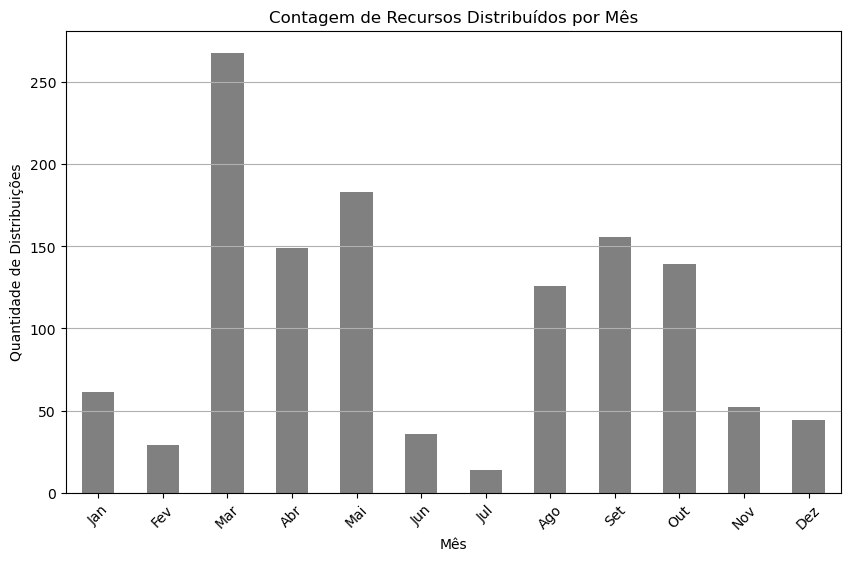

In [130]:
import matplotlib.pyplot as plt

# Converter a coluna 'Dt Distribuição' para datetime
df_distribuido['Dt Distribuição'] = pd.to_datetime(df_distribuido['Dt Distribuição'], format='%d/%m/%Y')

# Extrair o mês da coluna 'Data de Distribuição'
df_distribuido['Mês'] = df_distribuido['Dt Distribuição'].dt.month

# Contar a quantidade de distribuições por mês
distribuicoes_por_mes = df_distribuido['Mês'].value_counts().sort_index()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
distribuicoes_por_mes.plot(kind='bar', color='grey')
plt.title('Contagem de Recursos Distribuídos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Distribuições')
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
plt.grid(axis='y')
plt.show()

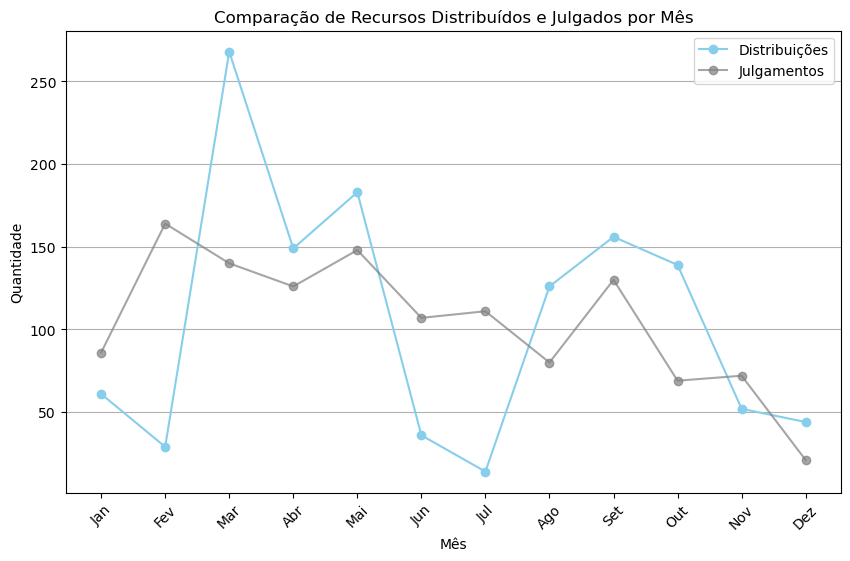

In [131]:
# Plotar o gráfico comparativo
plt.figure(figsize=(10, 6))
distribuicoes_por_mes.plot(kind='line', marker='o', color='skyblue', label='Distribuições')
julgamentos_por_mes.plot(kind='line', marker='o', color='grey', alpha=0.7, label='Julgamentos')
plt.title('Comparação de Recursos Distribuídos e Julgados por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

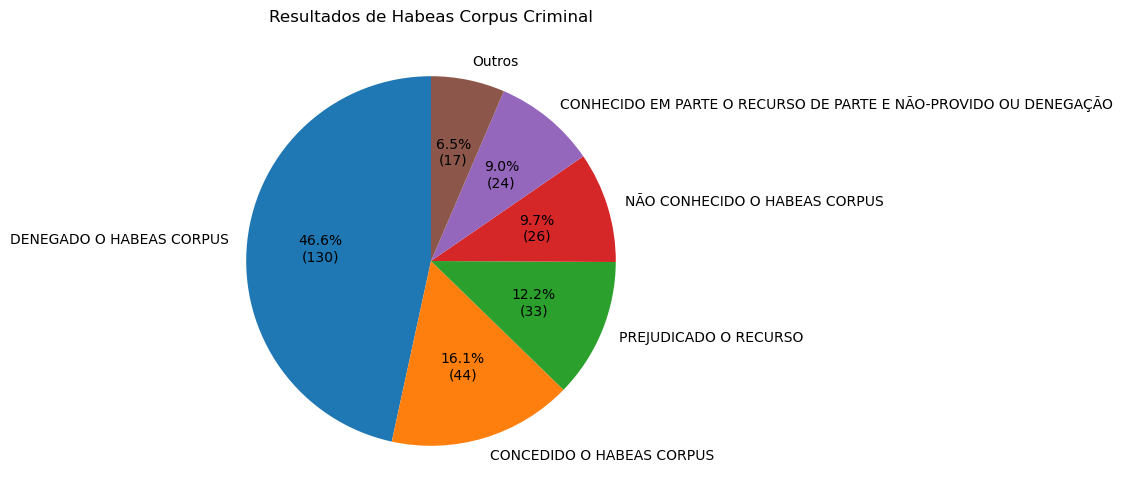

Total de Habeas Corpus Criminal: 279


In [114]:
# Filtrar os recursos de Habeas Corpus Criminal
hc_criminal = df_combined[df_combined['Tipo Recurso'] == 'Habeas Corpus Criminal']

# Contar a quantidade de cada resultado dos recursos de Habeas Corpus Criminal
resultados_hc_criminal = hc_criminal['Decisão'].value_counts()

# Filtrar resultados com menos de 2%
resultados_filtrados_hc_criminal = resultados_hc_criminal[resultados_hc_criminal >= (resultados_hc_criminal.sum() * 0.02)]
outros_hc_criminal = resultados_hc_criminal[resultados_hc_criminal < (resultados_hc_criminal.sum() * 0.02)].sum()
resultados_filtrados_hc_criminal['Outros'] = outros_hc_criminal

# Plotar o gráfico de pizza com valores absolutos
plt.figure(figsize=(10, 6))
resultados_filtrados_hc_criminal.plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n({int(p * resultados_hc_criminal.sum() / 100)})', startangle=90)
plt.title('Resultados de Habeas Corpus Criminal')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.show()

# Mostrar o total
total_hc_criminal = resultados_hc_criminal.sum()
print(f'Total de Habeas Corpus Criminal: {total_hc_criminal}')


Outros tipos de resultado: ['NÃO CONHECIDO O RECURSO DE PARTE', 'CONHECIDO EM PARTE O RECURSO DE PARTE E PROVIDO OU CONCESSÃO', 'PRESCRIÇÃO', 'PREJUDICADO O RECURSO', 'EXTINTO O PROCESSO POR AUSÊNCIA DE PRESSUPOSTOS PROCESSUAIS', 'SENTENÇA CONFIRMADA', 'SENTENÇA DESCONSTITUÍDA', 'NEGADO SEGUIMENTO AO RECURSO', 'EXTINTO O PROCESSO POR DESISTÊNCIA', 'EXTINTA A PUNIBILIDADE POR MORTE DO AGENTE']


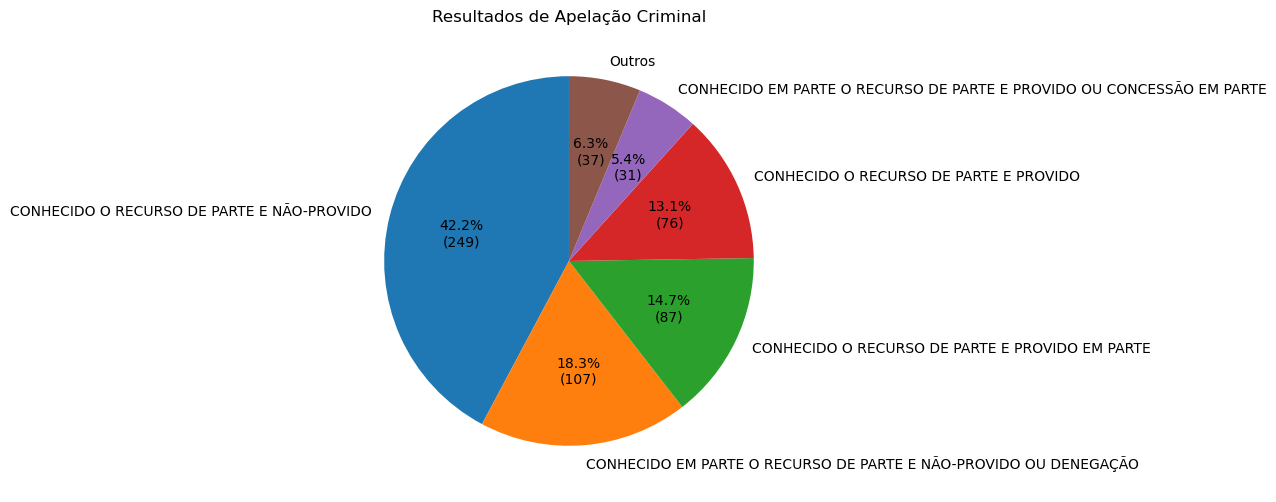

Total de Apelação Criminal: 590


In [115]:
# Filtrar os recursos de Apelação Criminal
apelacao_criminal = df_combined[df_combined['Classe Processual'] == 'Apelação Criminal']

# Contar a quantidade de cada resultado dos recursos de Apelação Criminal
resultados_apelacao = apelacao_criminal['Decisão'].value_counts()

# Filtrar resultados com menos de 2.5%
resultados_filtrados_apelacao = resultados_apelacao[resultados_apelacao >= (resultados_apelacao.sum() * 0.025)]
outros_apelacao = resultados_apelacao[resultados_apelacao < (resultados_apelacao.sum() * 0.025)].sum()
resultados_filtrados_apelacao['Outros'] = outros_apelacao

# Plotar o gráfico de pizza com valores absolutos
plt.figure(figsize=(10, 6))
resultados_filtrados_apelacao.plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n({int(p * resultados_apelacao.sum() / 100)})', startangle=90)
plt.title('Resultados de Apelação Criminal')
plt.ylabel('')  # Remove o rótulo do eixo y
# Excluir a legenda
plt.legend([], [], frameon=False)
# Identificar os tipos de resultado que foram agrupados como "Outros"
outros_tipos_apelacao = resultados_apelacao[resultados_apelacao < (resultados_apelacao.sum() * 0.025)].index.tolist()
print("Outros tipos de resultado:", outros_tipos_apelacao)
plt.show()

# Mostrar o total
total_apelacao = resultados_apelacao.sum()
print(f'Total de Apelação Criminal: {total_apelacao}')

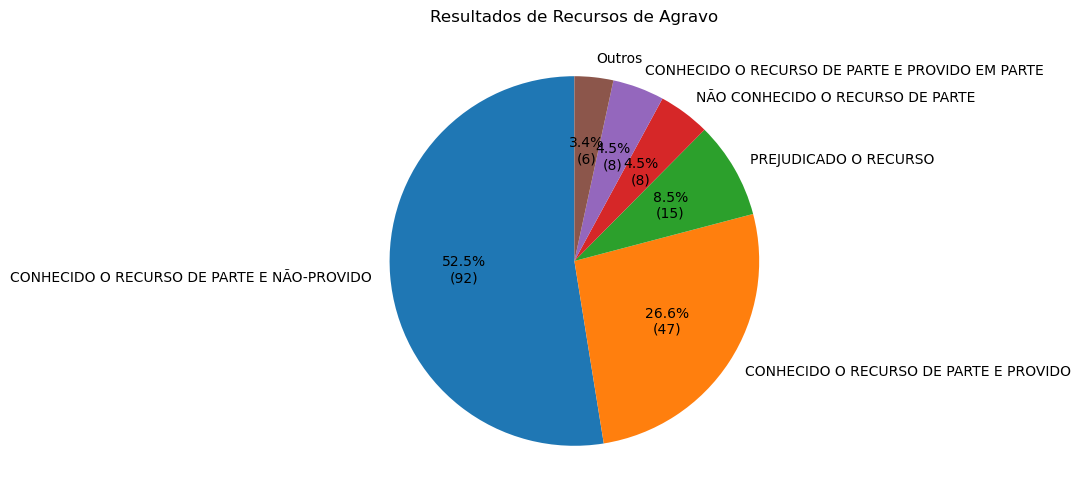

Total de Recursos de Agravo: 177


In [116]:
# Filtrar os recursos que o tipo inicie com "Agravo"
agravo_recursos = df_combined[df_combined['Tipo Recurso'].str.startswith('Agravo')]

# Contar a quantidade de cada resultado dos recursos de Agravo
resultados_agravo = agravo_recursos['Decisão'].value_counts()

# Filtrar resultados com menos de 2.5%
resultados_filtrados_agravo = resultados_agravo[resultados_agravo >= (resultados_agravo.sum() * 0.025)]
outros_agravo = resultados_agravo[resultados_agravo < (resultados_agravo.sum() * 0.025)].sum()
resultados_filtrados_agravo['Outros'] = outros_agravo

# Plotar o gráfico de pizza com valores absolutos
plt.figure(figsize=(10, 6))
resultados_filtrados_agravo.plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n({int(p * resultados_agravo.sum() / 100)})', startangle=90)
plt.title('Resultados de Recursos de Agravo')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.show()

# Mostrar o total
total_agravo = resultados_agravo.sum()
print(f'Total de Recursos de Agravo: {total_agravo}')


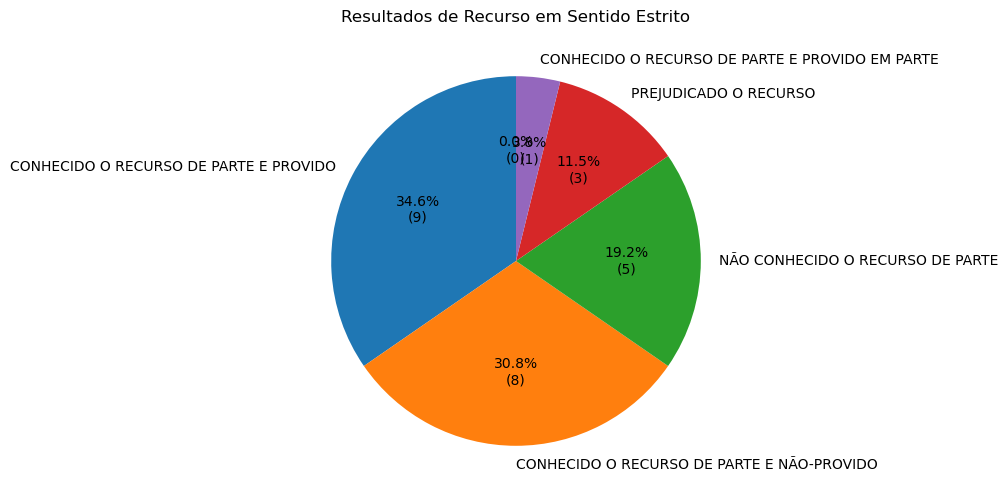

Total de Recurso em Sentido Estrito: 26


In [117]:
# Filtrar os recursos de Recurso em Sentido Estrito
recurso_sentido_estrito = df_combined[df_combined['Tipo Recurso'] == 'Recurso em Sentido Estrito']

# Contar a quantidade de cada resultado dos recursos de Recurso em Sentido Estrito
resultados_sentido_estrito = recurso_sentido_estrito['Decisão'].value_counts()

# Filtrar resultados com menos de 2.5%
resultados_filtrados_sentido_estrito = resultados_sentido_estrito[resultados_sentido_estrito >= (resultados_sentido_estrito.sum() * 0.025)]
outros_sentido_estrito = resultados_sentido_estrito[resultados_sentido_estrito < (resultados_sentido_estrito.sum() * 0.025)].sum()
resultados_filtrados_sentido_estrito['Outros'] = outros_sentido_estrito

# Plotar o gráfico de pizza com valores absolutos
plt.figure(figsize=(10, 6))
resultados_filtrados_sentido_estrito.plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n({int(p * resultados_sentido_estrito.sum() / 100)})', startangle=90)
plt.title('Resultados de Recurso em Sentido Estrito')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.show()

# Mostrar o total
total_sentido_estrito = resultados_sentido_estrito.sum()
print(f'Total de Recurso em Sentido Estrito: {total_sentido_estrito}')


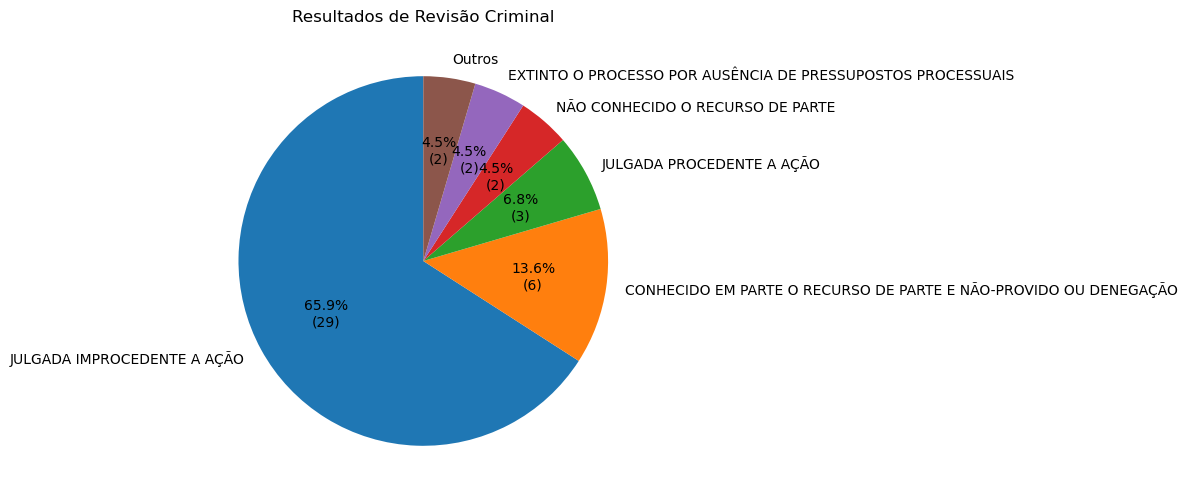

Total de Revisão Criminal: 44


In [118]:
# Filtrar os recursos de Revisão Criminal
revisao_criminal = df_combined[df_combined['Tipo Recurso'] == 'Revisão Criminal']

# Contar a quantidade de cada resultado dos recursos de Revisão Criminal
resultados_revisao = revisao_criminal['Decisão'].value_counts()

# Filtrar resultados com menos de 2.5%
resultados_filtrados_revisao = resultados_revisao[resultados_revisao >= (resultados_revisao.sum() * 0.025)]
outros_revisao = resultados_revisao[resultados_revisao < (resultados_revisao.sum() * 0.025)].sum()
resultados_filtrados_revisao['Outros'] = outros_revisao

# Plotar o gráfico de pizza com valores absolutos
plt.figure(figsize=(10, 6))
resultados_filtrados_revisao.plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n({int(p * resultados_revisao.sum() / 100)})', startangle=90)
plt.title('Resultados de Revisão Criminal')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.show()

# Mostrar o total
total_revisao = resultados_revisao.sum()
print(f'Total de Revisão Criminal: {total_revisao}')


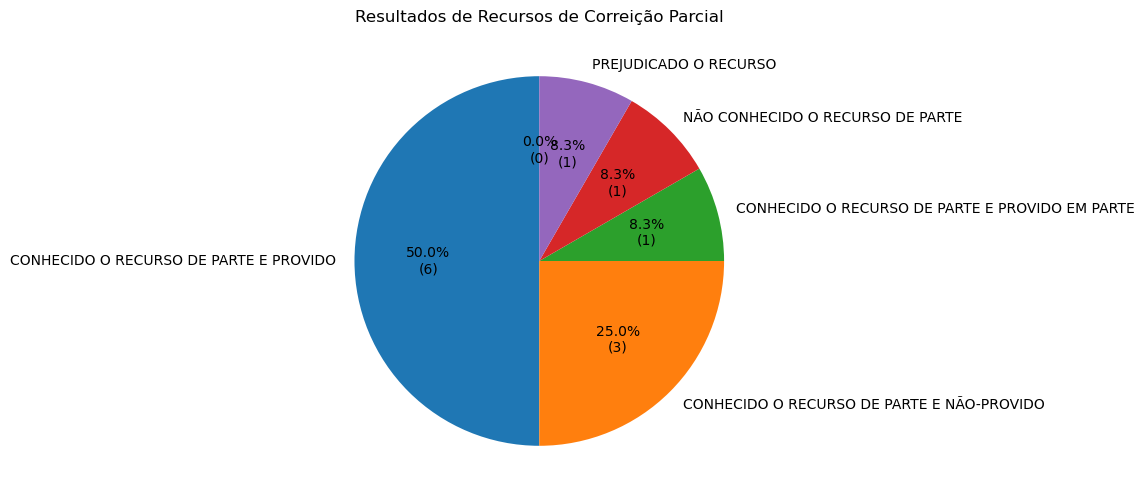

Total de Recursos de Correição Parcial: 12


In [119]:
# Filtrar os recursos de Correição Parcial
correicao_parcial = df_combined[df_combined['Tipo Recurso'].str.startswith('Correição Parcial')]

# Contar a quantidade de cada resultado dos recursos de Correição Parcial
resultados_correicao = correicao_parcial['Decisão'].value_counts()

# Filtrar resultados com menos de 2.5%
resultados_filtrados_correicao = resultados_correicao[resultados_correicao >= (resultados_correicao.sum() * 0.025)]
outros_correicao = resultados_correicao[resultados_correicao < (resultados_correicao.sum() * 0.025)].sum()
resultados_filtrados_correicao['Outros'] = outros_correicao

# Plotar o gráfico de pizza com valores absolutos
plt.figure(figsize=(10, 6))
resultados_filtrados_correicao.plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n({int(p * resultados_correicao.sum() / 100)})', startangle=90)
plt.title('Resultados de Recursos de Correição Parcial')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.show()

# Mostrar o total
total_correicao = resultados_correicao.sum()
print(f'Total de Recursos de Correição Parcial: {total_correicao}')


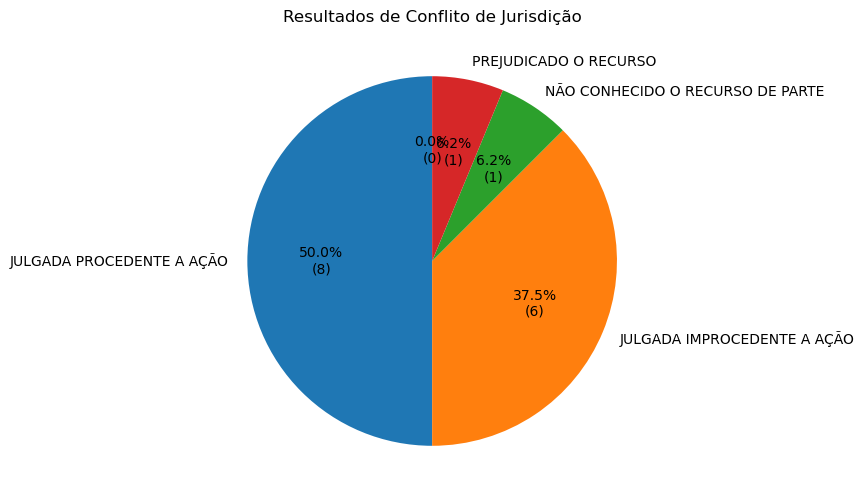

Total de Conflito de Jurisdição: 16


In [120]:
# Filtrar os recursos de Conflito de Jurisdição
conflito_jurisdicao = df_combined[df_combined['Tipo Recurso'].str.startswith('Conflito de Jurisdição')]

# Contar a quantidade de cada resultado dos recursos de Conflito de Jurisdição
resultados_conflito = conflito_jurisdicao['Decisão'].value_counts()

# Filtrar resultados com menos de 2.5%
resultados_filtrados_conflito = resultados_conflito[resultados_conflito >= (resultados_conflito.sum() * 0.025)]
outros_conflito = resultados_conflito[resultados_conflito < (resultados_conflito.sum() * 0.025)].sum()
resultados_filtrados_conflito['Outros'] = outros_conflito

# Plotar o gráfico de pizza com valores absolutos
plt.figure(figsize=(10, 6))
resultados_filtrados_conflito.plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n({int(p * resultados_conflito.sum() / 100)})', startangle=90)
plt.title('Resultados de Conflito de Jurisdição')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.show()

# Mostrar o total
total_conflito = resultados_conflito.sum()
print(f'Total de Conflito de Jurisdição: {total_conflito}')


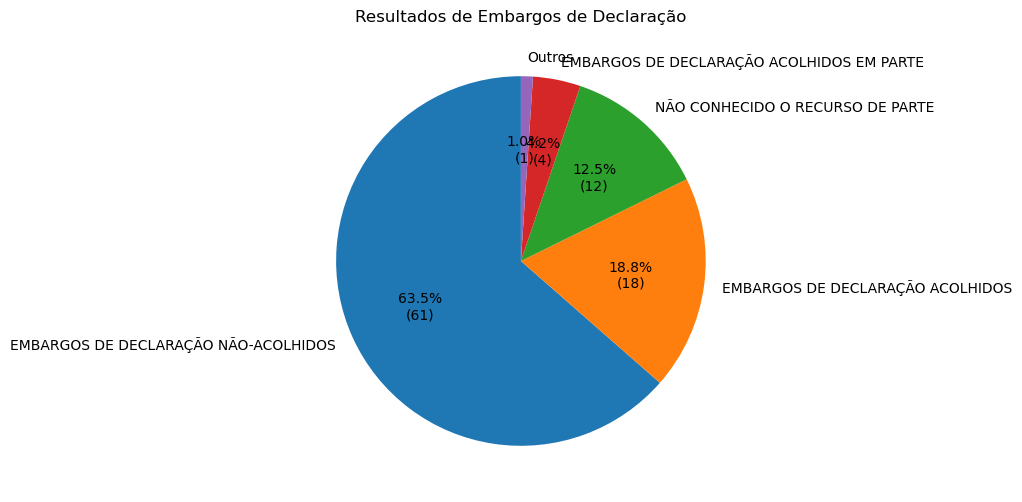

Total de Embargos de Declaração: 96


In [121]:
# Filtrar os recursos que o tipo inicie com "Embargos de Declaração"
embargos_declaracao = df_combined[df_combined['Tipo Recurso'].str.startswith('Embargos de Declaração')]

# Contar a quantidade de cada resultado dos recursos de Embargos de Declaração
resultados_embargos = embargos_declaracao['Decisão'].value_counts()

# Filtrar resultados com menos de 2.5%
resultados_filtrados_embargos = resultados_embargos[resultados_embargos >= (resultados_embargos.sum() * 0.025)]
outros_embargos = resultados_embargos[resultados_embargos < (resultados_embargos.sum() * 0.025)].sum()
resultados_filtrados_embargos['Outros'] = outros_embargos

# Plotar o gráfico de pizza com valores absolutos
plt.figure(figsize=(10, 6))
resultados_filtrados_embargos.plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n({int(p * resultados_embargos.sum() / 100)})', startangle=90)
plt.title('Resultados de Embargos de Declaração')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.show()

# Mostrar o total
total_embargos = resultados_embargos.sum()
print(f'Total de Embargos de Declaração: {total_embargos}')


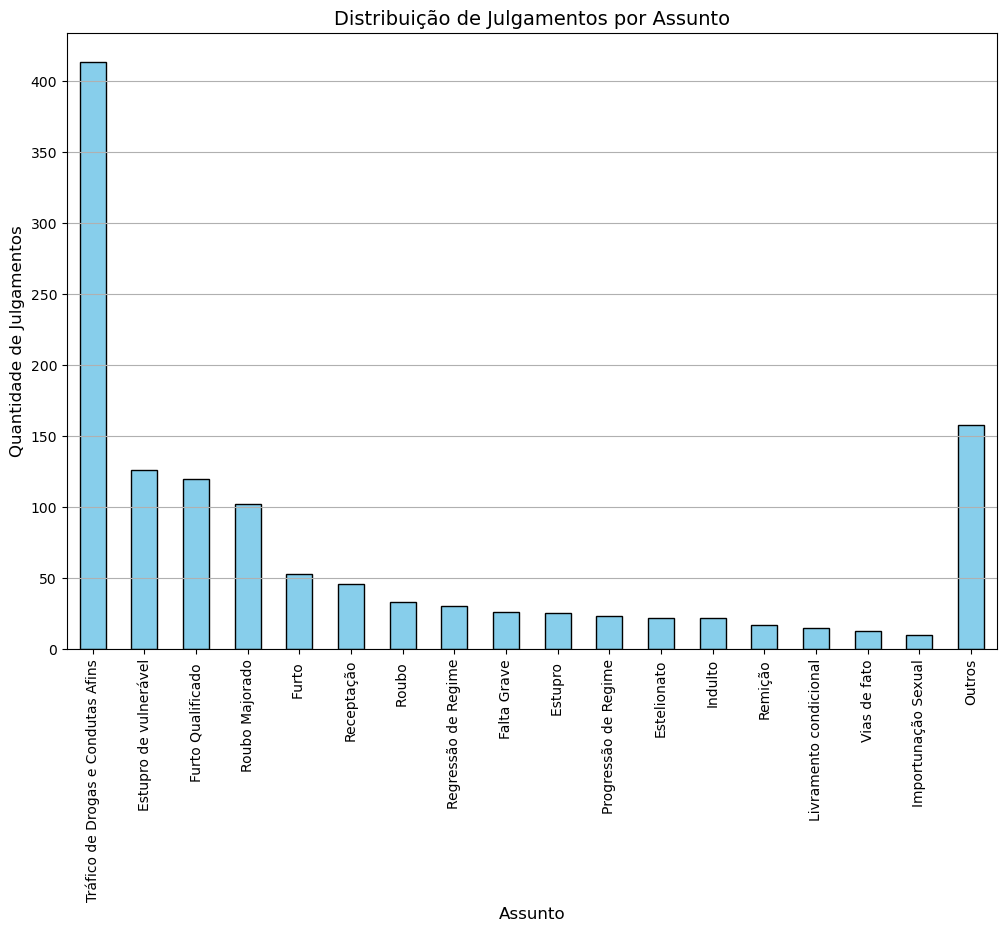

In [122]:
# Contar a quantidade de julgamentos por assunto
julgamentos_por_assunto = df_combined['Assunto'].value_counts()

# Filtrar assuntos com menos de 10 julgamentos
julgamentos_filtrados = julgamentos_por_assunto[julgamentos_por_assunto >= 10]
outros = julgamentos_por_assunto[julgamentos_por_assunto < 10].sum()
julgamentos_filtrados['Outros'] = outros

# Plotar o histograma
plt.figure(figsize=(12, 8))
julgamentos_filtrados.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição de Julgamentos por Assunto', fontsize=14)
plt.xlabel('Assunto', fontsize=12)
plt.ylabel('Quantidade de Julgamentos', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.show()
